In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [34]:
CIFAR100 = tf.keras.datasets.cifar100

In [35]:
(train_images, Train_labels), (Test_images, Test_labels) = CIFAR100.load_data()


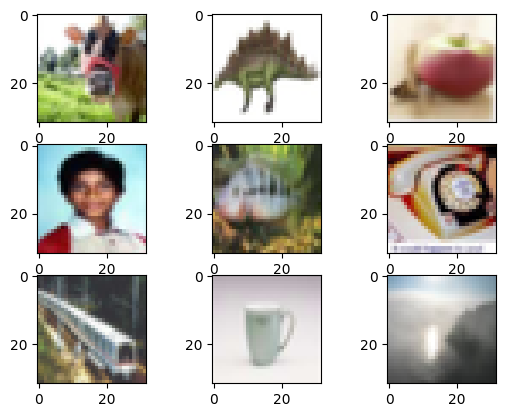

In [36]:
for i in range(9):
  # defining a pyplot 
  plt.subplot(330 +1 +i)
 
 # showing the first 9 images ( plotting the raw pixel data )
  plt.imshow(train_images[i])

In [37]:

print(train_images.shape)
print(train_images[0])

(50000, 32, 32, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


In [38]:
trainX= train_images/ 255.0
testX = Test_images/ 255.0

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(100, activation=tf.nn.softmax)
])


In [40]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
CIFAR10Dense= model.fit(trainX, Train_labels, epochs = 20, validation_data= (testX, Test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 4.6073 - accuracy: 0.0093 - val_loss: 4.5425 - val_accuracy: 0.0175
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 4.2500 - accuracy: 0.0451 - val_loss: 4.0200 - val_accuracy: 0.0778
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 4.0080 - accuracy: 0.0765 - val_loss: 3.8771 - val_accuracy: 0.1046
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 3.9137 - accuracy: 0.0920 - val_loss: 3.7995 - val_accuracy: 0.1144
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 3.8523 - accuracy: 0.1011 - val_loss: 3.7598 - val_accuracy: 0.1207
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 3.8064 - accuracy: 0.1097 - val_loss: 3.7327 - val_accuracy: 0.1325
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 3.7650 - accuracy: 0.1151 - val_loss: 3.6957 - val_accurac

In [42]:
model.evaluate(testX, Test_labels, verbose=2)

313/313 - 1s - loss: 3.5346 - accuracy: 0.1650 - 634ms/epoch - 2ms/step


[3.5346004962921143, 0.16500000655651093]

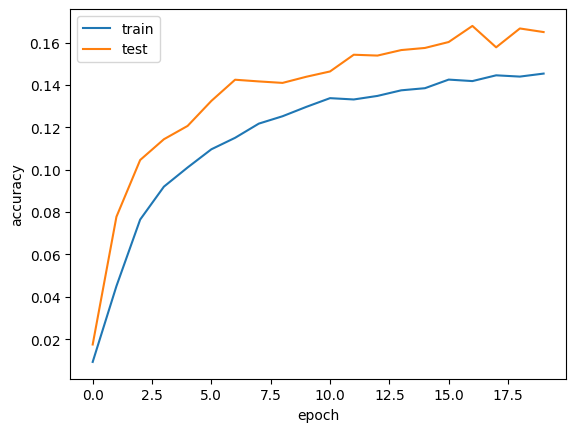

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(CIFAR10Dense.history['accuracy'])
plt.plot(CIFAR10Dense.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
from tensorflow.keras import layers
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [48]:
model_cnn = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='softmax')

])

In [49]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [50]:
CIFAR100CNN= model_cnn.fit(trainX, Train_labels, epochs = 20, validation_data= (testX, Test_labels))

Epoch 1/20
1563/1563 [==============================] - 19s 10ms/step - loss: 4.1275 - accuracy: 0.0654 - val_loss: 3.8603 - val_accuracy: 0.0978
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 3.6173 - accuracy: 0.1363 - val_loss: 3.4105 - val_accuracy: 0.1801
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 3.2491 - accuracy: 0.2044 - val_loss: 3.0821 - val_accuracy: 0.2368
Epoch 4/20
1563/1563 [==============================] - 13s 9ms/step - loss: 3.0092 - accuracy: 0.2486 - val_loss: 3.0912 - val_accuracy: 0.2410
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.8251 - accuracy: 0.2823 - val_loss: 2.8205 - val_accuracy: 0.2919
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 2.6759 - accuracy: 0.3127 - val_loss: 2.7815 - val_accuracy: 0.2983
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 2.5483 - accuracy: 0.3372 - val_loss: 2.7175 - val_

In [51]:
model_cnn.evaluate(testX, Test_labels, verbose = 2)

313/313 - 1s - loss: 2.3291 - accuracy: 0.4245 - 1s/epoch - 3ms/step


[2.3291499614715576, 0.4244999885559082]

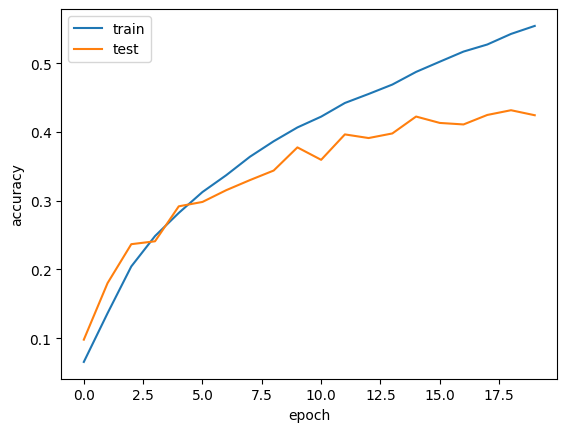

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(CIFAR100CNN.history['accuracy'])
plt.plot(CIFAR100CNN.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()